In [3]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from aoe2mapgenerator.common.enums.enum import (
    MapLayerType, 
    ObjectSize, 
    GateTypes, 
    TemplateTypes, 
    ObjectRotation, 
    YamlReplacementKeywords,
    CheckPlacementReturnTypes
)

from aoe2mapgenerator.scenario.scenario import Scenario
import numpy as np
import random
from aoe2mapgenerator.common.constants.constants import DEFAULT_EMPTY_VALUE, BASE_SCENE_DIR, BASE_SCENARIO_NAME, TEMPLATE_DIR
from aoe2mapgenerator.common.enums.enum import GateTypes
import multiprocessing as mp
from aoe2mapgenerator.map.map import Map
import os
from aoe2mapgenerator.serializer.serializer import (
    _convert_map_value_to_string,_get_enum_list, 
    _recursive_parse_enum_to_string, serialize_map, 
    get_all_functions_and_arguments, 
    _get_functions,
    _get_function_arguments,
    _get_default_arguments,
    _convert_enum_instance_to_string)
from aoe2mapgenerator.triggers.triggers import TriggerObject
from aoe2mapgenerator.maingenerator import main_map_generator
import inspect
import ast
import json
from enum import Enum
from AoE2ScenarioParser.scenarios.aoe2_de_scenario import AoE2DEScenario
# from aoe2mapgenerator.units.placers.templateplacer import _convert_parameter_to_python_type

In [2]:
from pydantic import BaseModel
from pydantic2ts import generate_typescript_defs
from typing import Callable

ModuleNotFoundError: No module named 'pydantic'

In [4]:
class TestEnum(BaseModel):
    This_is_the_player_id: PlayerId
    # unit: UnitInfo

In [5]:
class AnotherOne(BaseModel):
    func: Callable

In [6]:
def coolfunc():
    print("cool")

In [7]:
f = AnotherOne(func=coolfunc)

In [8]:
f.func()

cool


In [9]:
a = TestEnum(This_is_the_player_id=PlayerId.ONE)

In [10]:
TestEnum.model_validate_json(a.model_dump_json())

TestEnum(This_is_the_player_id=<PlayerId.ONE: 1>)

In [14]:
print(json.dumps(TestEnum.model_json_schema(), indent=2))

{
  "$defs": {
    "PlayerId": {
      "enum": [
        0,
        1,
        2,
        3,
        4,
        5,
        6,
        7,
        8
      ],
      "title": "PlayerId",
      "type": "integer"
    }
  },
  "properties": {
    "This_is_the_player_id": {
      "$ref": "#/$defs/PlayerId"
    }
  },
  "required": [
    "This_is_the_player_id"
  ],
  "title": "TestEnum",
  "type": "object"
}


In [11]:
MODEL_PATH = r"C:\Users\josep\OneDrive\Documents\GitHub\aoe2mapgenerator\aoe2mapgenerator\models"

In [12]:
generate_typescript_defs(rf"{MODEL_PATH}\pydanticModels.py", rf"{MODEL_PATH}\convertedModels.ts")

Exception: json2ts must be installed. Instructions can be found here: https://www.npmjs.com/package/json-schema-to-typescript

In [44]:
class Custom(BaseModel):
    awesome: PlayerId
    count: int

In [45]:
obj = Custom(awesome=PlayerId(1), count=3)

In [50]:
class CoolThing(BaseModel):
    a: int
    b: Custom
    c: int

In [52]:
a = CoolThing(a=1, b=obj, c=[(obj, "a"), (obj, "b")])

In [55]:
a.model_dump_json()

'{"a":1,"b":{"awesome":1,"count":3},"c":[[{"awesome":1,"count":3},"a"],[{"awesome":1,"count":3},"b"]]}'

In [60]:
model = CoolThing.model_validate_json(a.model_dump_json())

In [61]:
model

CoolThing(a=1, b=Custom(awesome=<PlayerId.ONE: 1>, count=3), c=[(Custom(awesome=<PlayerId.ONE: 1>, count=3), 'a'), (Custom(awesome=<PlayerId.ONE: 1>, count=3), 'b')])

In [2]:
AOE2_GAME_SCENARIO_FILE_PATH = "C:/Users/josep/Games/Age of Empires 2 DE/76561198242754748/resources/_common/scenario"
AOE2_BASE_SCENARIO_FILE_PATH = "C:/Users/josep/OneDrive/aDocuments/GitHub/PersonalWebsite/mywebsite/aoe2_map_generator/aoe2_files/scenarios/BASE_SCENARIO.aoe2scenario"




In [3]:
scenario = AoE2DEScenario.from_file(AOE2_BASE_SCENARIO_FILE_PATH)
trigger_object = TriggerObject(scenario)


[19:09:47] Reading file: 'C:/Users/josep/OneDrive/Documents/GitHub/PersonalWebsite/mywebsite/aoe2_map_generator/aoe2_files/scenarios/BASE_SCENARIO.aoe2scenario'
[19:09:47] Reading scenario file finished successfully.

############### Attributes ###############
>>> Game version: 'DE'
>>> Scenario version: 1.51
>>> Scenario variant: 'Age of Empires 2'
##########################################

[19:09:47] Loading scenario structure finished successfully.
[19:09:47] Parsing scenario file...
	✔ FileHeadereHeader data...
	✔ DataHeaderaHeader data...
	✔ Messagesessages data...
	✔ Cinematicsematics data...
	✔ BackgroundImagendImage data...
	✔ PlayerDataTwoDataTwo data...
	✔ GlobalVictoryVictory data...
	✔ Diplomacyplomacy data...
	✔ OptionsOptions data...
	✔ Maping Map data...
	✔ Unitsg Units data...
	✔ Triggersriggers data...
	✔ Filesg Files data...
[19:09:47] Parsing scenario file finished successfully.

[19:09:47] Setting up managers ...
	✔ MessageManagereManager...
	✔ PlayerManagerrManag

In [4]:
scenario.unit_manager

UnitManagerDE: 	{
		_instance_number_history: 	[]
		_uuid: f952c487-80e5-4b16-b8cb-420e63e0483b
		_player_units: [PlayerUnits: 	{
			_instance_number_history: 	[]
			_uuid: f952c487-80e5-4b16-b8cb-420e63e0483b
			unit_count: 1369
			units: [Unit: 	{
				_instance_number_history: 	[]
				_uuid: f952c487-80e5-4b16-b8cb-420e63e0483b
				player: GAIA
				x: 19.079437255859375
				y: 0.47385984659194946
				z: 0.0
				reference_id: 0
				unit_const: 1358
				status: 2
				rotation: 2.0
				initial_animation_frame: 2
				garrisoned_in_id: -1
			}
		, Unit: 	{
				_instance_number_history: 	[]
				_uuid: f952c487-80e5-4b16-b8cb-420e63e0483b
				player: GAIA
				x: 28.814186096191406
				y: 0.2086469978094101
				z: 0.0
				reference_id: 1
				unit_const: 1358
				status: 2
				rotation: 6.0
				initial_animation_frame: 6
				garrisoned_in_id: -1
			}
		, Unit: 	{
				_instance_number_history: 	[]
				_uuid: f952c487-80e5-4b16-b8cb-420e63e0483b
				player: GAIA
				x: 35.35112380981445
				y: 

In [7]:
trigger_object.create_objects_in_area(0,0,10,10,UnitInfo.CATAPHRACT, PlayerId.ONE)
trigger_object.create_objects_in_area(15,15,22,22,UnitInfo.CATAPHRACT, PlayerId.ONE)
trigger_object.teleport_objects_in_area(0,0,100,5,25,25,PlayerId.ONE)
# trigger_object.teleport_objects_from_area_to_area(0,0,25,25,25,25,50,50,PlayerId.ONE)

In [8]:
scenario.write_to_file(BASE_SCENE_DIR + "triggertest.aoe2scenario")


[21:15:34] Reconstructing sections and structs from managers...
	✔ MessageManagerssageManager...
	✔ PlayerManagerlayerManager...
	✔ MapManagerg MapManager...
	✔ UnitManager UnitManager...
	✔ TriggerManageriggerManager...
	✔ XsManagerng XsManager...
[21:15:34] Reconstruction finished successfully.

[21:15:34] File writing from structure started...
	✔ FileHeaderg FileHeader...
	✔ DataHeaderg DataHeader...
	✔ Messagesing Messages...
	✔ Cinematicsg Cinematics...
	✔ BackgroundImagekgroundImage...
	✔ PlayerDataTwolayerDataTwo...
	✔ GlobalVictorylobalVictory...
	✔ Diplomacyng Diplomacy...
	✔ Optionsting Options...
	✔ Maptructing Map...
	✔ Unitsucting Units...
	✔ Triggersing Triggers...
	✔ Filesucting Files...
[21:15:34] File writing finished successfully.
[21:15:34] File successfully written to: 'C:\Users\josep\Games\Age of Empires 2 DE\76561198242754748\resources\_common\scenario\triggertest.aoe2scenario'
[21:15:34] Execution time from scenario read: 1.27s


In [70]:
# Save reference to the manager, so you don't have to do "scenario.trigger_manager..." each time
trigger_manager = scenario.trigger_manager

# Save the created trigger
hello_world_trigger = trigger_manager.add_trigger("Hello World Trigger")
# Add display_instructions effect to the new trigger
# hello_world_trigger.new_effect.display_instructions(
#     display_time=11,
#     message="Hello World"
# )

for i in range(10):
    hello_world_trigger.new_effect.create_object(object_list_unit_id=UnitInfo.AMAZON_ARCHER.ID, source_player=PlayerId.ONE, location_x=i, location_y=2)
print("Done")

Done



[20:53:31] Reconstructing sections and structs from managers...
	✔ MessageManagerssageManager...
	✔ PlayerManagerlayerManager...
	✔ MapManagerg MapManager...
	✔ UnitManager UnitManager...
	✔ TriggerManageriggerManager...
	✔ XsManagerng XsManager...
[20:53:31] Reconstruction finished successfully.

[20:53:31] File writing from structure started...
	✔ FileHeaderg FileHeader...
	✔ DataHeaderg DataHeader...
	✔ Messagesing Messages...
	✔ Cinematicsg Cinematics...
	✔ BackgroundImagekgroundImage...
	✔ PlayerDataTwolayerDataTwo...
	✔ GlobalVictorylobalVictory...
	✔ Diplomacyng Diplomacy...
	✔ Optionsting Options...
	✔ Maptructing Map...
	✔ Unitsucting Units...
	✔ Triggersing Triggers...
	✔ Filesucting Files...
[20:53:31] File writing finished successfully.
[20:53:31] File successfully written to: 'C:\Users\josep\Games\Age of Empires 2 DE\76561198242754748\resources\_common\scenario\triggertest.aoe2scenario'
[20:53:31] Execution time from scenario read: 4.85s


In [72]:
scenario.write_to_file(BASE_SCENE_DIR + "triggertest.aoe2scenario")


[19:40:57] Reconstructing sections and structs from managers...
	✔ MessageManagerssageManager...
	✔ PlayerManagerlayerManager...
	✔ MapManagerg MapManager...
	✔ UnitManager UnitManager...
	✔ TriggerManageriggerManager...
	✔ XsManagerng XsManager...
[19:40:58] Reconstruction finished successfully.

[19:40:58] File writing from structure started...
	✔ FileHeaderg FileHeader...
	✔ DataHeaderg DataHeader...
	✔ Messagesing Messages...
	✔ Cinematicsg Cinematics...
	✔ BackgroundImagekgroundImage...
	✔ PlayerDataTwolayerDataTwo...
	✔ GlobalVictorylobalVictory...
	✔ Diplomacyng Diplomacy...
	✔ Optionsting Options...
	✔ Maptructing Map...
	✔ Unitsucting Units...
	✔ Triggersing Triggers...
	✔ Filesucting Files...
[19:40:58] File writing finished successfully.
[19:40:58] File successfully written to: 'C:\Users\josep\Games\Age of Empires 2 DE\76561198242754748\resources\_common\scenario\triggertest.aoe2scenario'
[19:40:58] Execution time from scenario read: 164.63s


In [2]:
input_name = "1 vs 7 default.aoe2scenario"
output_name = "TEST_BASIC_SCENARIO.aoe2scenario"

In [3]:
map = main_map_generator(BASE_SCENE_DIR+BASE_SCENARIO_NAME, BASE_SCENE_DIR+"AWESOMEMAP.aoe2scenario", TEMPLATE_DIR)

BUILD FOREST
NEW TEMPLATE LOADED: snow_forest.yaml
The value (<TerrainId.GRASS_2: 12>, <PlayerId.GAIA: 0>) is not present in the MapLayerType.TERRAIN map.
BUILD FOREST
The value (<TerrainId.GRASS_2: 12>, <PlayerId.GAIA: 0>) is not present in the MapLayerType.TERRAIN map.
BUILD FOREST
BUILD FOREST
BUILD CITY
NEW TEMPLATE LOADED: oak_forest.yaml
NEW TEMPLATE LOADED: walls.yaml
NEW TEMPLATE LOADED: City.yaml
BUILD CITY
BUILD CITY


In [4]:
map_size = 256
map = Map(map_size)
new_zones = map.voronoi(75)

keys = list(map.get_map_layer(MapLayerType.UNIT).dict.keys())

for city_zone in keys:
    map.add_borders(
        [MapLayerType.TERRAIN, MapLayerType.UNIT, MapLayerType.ZONE, MapLayerType.DECOR],
        [city_zone, city_zone, city_zone,city_zone],
        TerrainId.ROAD_FUNGUS,
        margin = 2,
        )

In [5]:
json = serialize_map(map)

In [15]:
def fun(default = 27):
    print(default)

In [8]:
def build_city(zone, player_id):
    """
    Build city in zone
    """
    print("BUILD CITY")

    map.add_borders(
        [MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.UNIT, MapLayerType.DECOR],
        [zone, zone, zone, zone],
        TerrainId.GRASS_2,
        margin = 10
        )

    map.place_template(
            'oak_forest.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [zone, (TerrainId.GRASS_2, PlayerId.GAIA), zone, zone],
            player_id = player_id,
        )

    map.place_template(
            'walls.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [zone, zone, zone, zone],
            player_id = player_id,
        )
    
    map.add_borders(
        [MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.UNIT, MapLayerType.DECOR],
        [zone, zone, zone, zone],
        TerrainId.ROAD_FUNGUS,
        margin = 1
        )
    
    city_zones = map.voronoi(35,
                [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
                [zone, zone, zone, zone],
            )
    
    for city_zone in city_zones:
        map.add_borders(
            [MapLayerType.TERRAIN, MapLayerType.UNIT, MapLayerType.ZONE, MapLayerType.DECOR],
            [city_zone, city_zone, city_zone, city_zone],
            TerrainId.ROAD_FUNGUS,
            margin = 1
            )
        
        map.place_template(
            'oak_forest.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [city_zone, city_zone, city_zone, city_zone],
        )

        map.place_template(
            'City.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [city_zone, city_zone, city_zone, city_zone],
            player_id = player_id,
        )

In [9]:
def build_snow_forest(zone, player_id):
    """
    Build snow forest in zone
    """
    print("BUILD FOREST")
    
    map.place_template(
            'snow_forest.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [zone, zone, zone, zone],
            player_id = player_id,
        )

In [10]:
counter = 0
for i, zone in enumerate(new_zones):
    # print(zone)
    counter += 1
    if counter >= 9:
        counter = 1
    
    if random.random() > 0.5:
        build_city(zone, PlayerId(counter))
    else:
        build_snow_forest(zone, PlayerId(counter))
        

BUILD CITY
NEW TEMPLATE LOADED: oak_forest.yaml
MapLayerType UNIT
MapLayerType TERRAIN
MapLayerType ZONE
MapLayerType DECOR
OtherInfo TREE_OAK_FOREST
PARAMETER:  map_layer_type_list
[<MapLayerType.UNIT: 0>, <MapLayerType.TERRAIN: 1>, <MapLayerType.ZONE: 3>, <MapLayerType.DECOR: 2>]
PARAMETER:  array_space_type_list
[(-1, <PlayerId.GAIA: 0>), (<TerrainId.GRASS_2: 12>, <PlayerId.GAIA: 0>), (-1, <PlayerId.GAIA: 0>), (-1, <PlayerId.GAIA: 0>)]
PARAMETER:  obj_type_list
[<OtherInfo.TREE_OAK_FOREST: (411, 32, 415, 16277, True)>]
PARAMETER:  player_id
None
PARAMETER:  groups
None
PARAMETER:  groups_density
1
PARAMETER:  group_size
250
PARAMETER:  group_density
1
PARAMETER:  clumping
7
PARAMETER:  clumping_func
None
PARAMETER:  margin
0
PARAMETER:  start_point
[-1, -1]
PARAMETER:  ghost_margin
True
PARAMETER:  place_on_n_maps
1
MapLayerType UNIT
MapLayerType TERRAIN
MapLayerType ZONE
MapLayerType DECOR
OtherInfo TREE_OAK_FOREST
PARAMETER:  map_layer_type_list
[<MapLayerType.UNIT: 0>, <MapLayerT

In [42]:
def _get_map_function_arguments(map, function_name: str) -> list:
    """
    Retrieves a list of arguments for a given function.
    
    Args:
        map (Map): Map object to modify.
        function_name (str): Name of the function to retrieve arguments from.
    
    Returns: 
        list: List of arguments for the given function.
    """
    return [arg for arg in map.__getattribute__(function_name).__code__.co_varnames if arg != 'self']

In [14]:
map = Map(200)

In [15]:
import cProfile
data = cProfile.run('map.place_groups([MapLayerType.UNIT], [(0, PlayerId.GAIA)], UnitInfo.CATAPHRACT, PlayerId.ONE, 1, 500)')

         139042 function calls in 0.061 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.061    0.061 <string>:1(<module>)
     1002    0.000    0.000    0.001    0.000 enum.py:359(__call__)
     1002    0.001    0.000    0.001    0.000 enum.py:678(__new__)
     1002    0.000    0.000    0.000    0.000 enum.py:73(_missing_)
     1000    0.000    0.000    0.000    0.000 enum.py:783(__hash__)
     1002    0.000    0.000    0.000    0.000 enum.py:801(value)
     1000    0.001    0.000    0.002    0.000 map.py:129(set_point)
     1502    0.001    0.000    0.001    0.000 map.py:41(get_map_layer)
     1000    0.000    0.000    0.002    0.000 map.py:69(set_point)
      502    0.000    0.000    0.000    0.000 map_utils.py:11(get_dictionary_from_map_layer_type)
        1    0.000    0.000    0.000    0.000 map_utils.py:41(get_intersection_of_spaces)
    40000    0.006    0.000    0.042    0.000 object

In [12]:

map.place_groups([MapLayerType.UNIT], [(0, PlayerId.GAIA)], UnitInfo.CATAPHRACT, PlayerId.ONE, 1, 500)

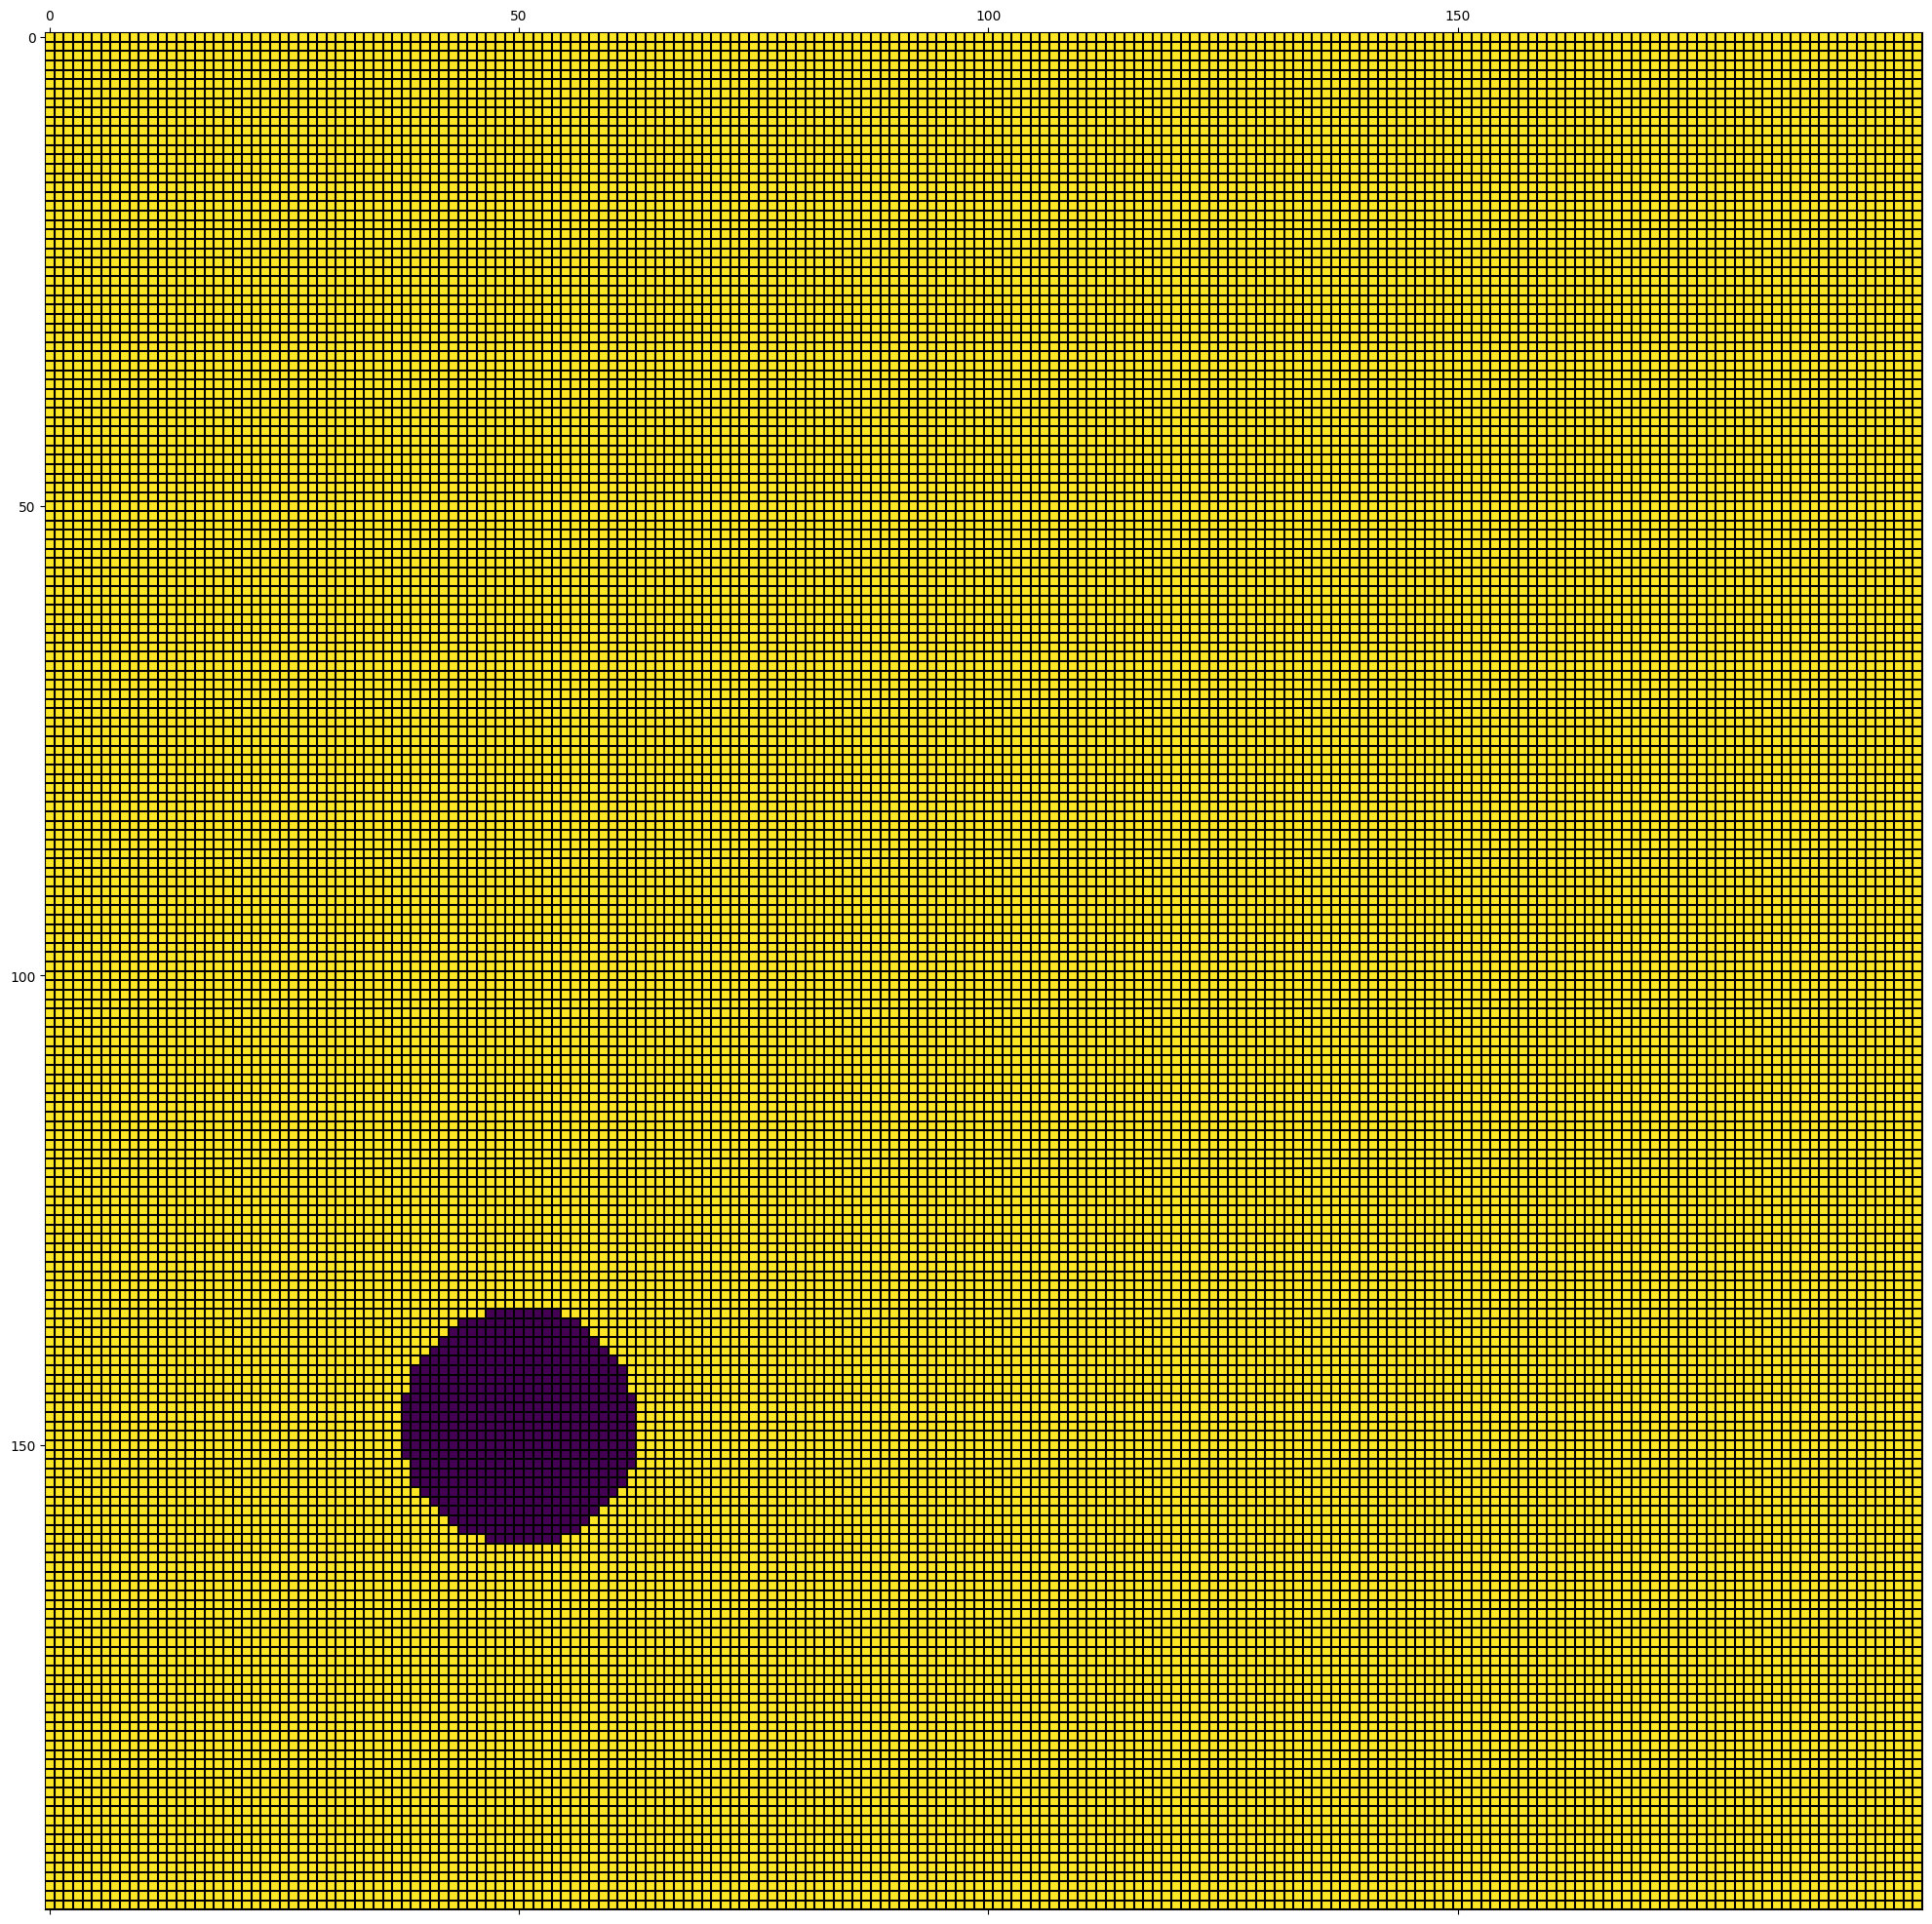

In [13]:
map.visualize_mat(MapLayerType.UNIT, include_zones=False)

In [13]:
scenario = Scenario(map)


[23:19:22] Reading file: 'C:\Users\josep\Games\Age of Empires 2 DE\76561198242754748\resources\_common\scenario\BASE_SCENARIO.aoe2scenario'
[23:19:22] Reading scenario file finished successfully.

############### Attributes ###############
>>> Game version: 'DE'
>>> Scenario version: 1.51
>>> Scenario variant: 'Age of Empires 2'
##########################################

[23:19:22] Loading scenario structure finished successfully.
[23:19:22] Parsing scenario file...
	✔ FileHeadereHeader data...
	✔ DataHeaderaHeader data...
	✔ Messagesessages data...
	✔ Cinematicsematics data...
	✔ BackgroundImagendImage data...
	✔ PlayerDataTwoDataTwo data...
	✔ GlobalVictoryVictory data...
	✔ Diplomacyplomacy data...
	✔ OptionsOptions data...
	✔ Maping Map data...
	✔ Unitsg Units data...
	✔ Triggersriggers data...
	✔ Filesg Files data...
[23:19:23] Parsing scenario file finished successfully.

[23:19:23] Setting up managers ...
	✔ MessageManagereManager...
	✔ PlayerManagerrManager...
	✔ MapManagerpM

In [14]:
scenario._change_map_size(map_size)
scenario.write_map()
scenario.save_file(os.path.join(BASE_SCENE_DIR, "TestScenario9999999.aoe2scenario"))

ValueError: None is not a valid PlayerId

In [ ]:
import tkinter as tk

n = 10
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'white']

def on_color_click(color):
    global selected_color
    selected_color = color

def on_square_click(row, col):
    btn = buttons[row][col]
    # print(btn)
    # print(type(btn))
    if btn.cget('bg') == selected_color:
        btn.config(bg='white')
    else:
        btn.config(bg=selected_color)

default_color = 'white'

root = tk.Tk()

frame = tk.Frame(root)
frame.pack(side=tk.LEFT)

buttons = []
for i in range(n):
    row = []
    for j in range(n):
        btn = tk.Button(frame, text='    ', command=lambda i=i, j=j: on_square_click(i, j), bg = default_color)
        btn.grid(row=i, column=j)
        row.append(btn)
    buttons.append(row)

color_frame = tk.Frame(root)
color_frame.pack(side=tk.RIGHT)

for color in colors:
    color_label = tk.Label(color_frame, text=color)
    color_label.pack(side=tk.BOTTOM)
    btn = tk.Button(color_frame, bg=color, command=lambda color=color: on_color_click(color))
    btn.pack(side=tk.BOTTOM)

selected_color = colors[0]

root.mainloop()

In [4]:
import tkinter as tk

root = tk.Tk()

# create three labels
label1 = tk.Label(root, text="Label 1")
label2 = tk.Label(root, text="Label 2")
label3 = tk.Label(root, text="Label 3")

# pack the first two labels to the left
label1.pack(side="left")
label2.pack(side="left")

# pack the third label to the right
label3.pack(side="right")

root.mainloop()